Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [73]:
%matplotlib inline

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [74]:
import thinkplot
import thinkstats2
import brfss
import numpy as np

df = brfss.ReadBrfss(nrows = None)

In [75]:
%matplotlib inline

#brfss.CleanBrfssFrame(df)
df = df.dropna(subset=['wtkg2','htm3'])
w = df.wtkg2
h = df.htm3

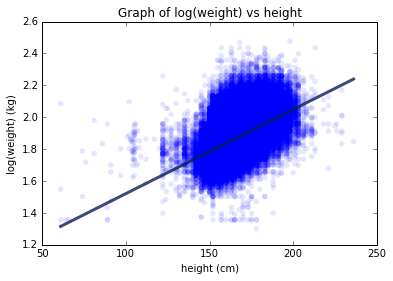

In [76]:
"""Linear square fit for log(weight) versus height"""
log_w = np.log10(w)
inter, slope = thinkstats2.LeastSquares(h, log_w)
#print inter, slope

#Plotting for log(weight) vs height
#thinkplot.HexBin(h, log_w)
thinkplot.Scatter(h, log_w, alpha = 0.1)

xs,ys = thinkstats2.FitLine(h, inter, slope)
thinkplot.Plot(xs,ys)
thinkplot.Config(title = 'Graph of log(weight) vs height', 
                 ylabel='log(weight) (kg)', 
                 xlabel='height (cm)', 
                 legend = None)

thinkplot.Show()

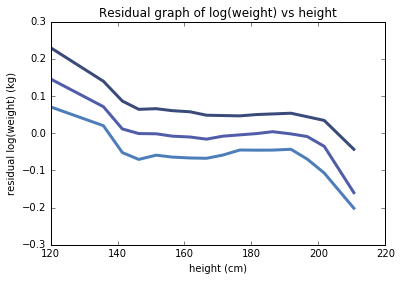

In [77]:
"""Plotting Percentiles"""
res = thinkstats2.Residuals(h, log_w, inter, slope)

bins = np.arange(135, 210, 5)
indices = np.digitize(df.htm3, bins)
groups = df.groupby(indices)

#for i, group in groups:
#    print(i, len(group))
df['res'] = res
heights = [group.htm3.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.res) for i, group in groups]
    
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    thinkplot.Plot(heights, weights, label = '%dth' % percent)

thinkplot.Config(title = 'Residual graph of log(weight) vs height', 
                 ylabel='residual log(weight) (kg)', 
                 xlabel='height (cm)', 
                 legend = None)
thinkplot.Show()

The relationship between the variables is roughly linear in the 150cm - 190cm height range

In [82]:
"""Resampled rows"""

estimates = thinkstats2.ResampleRows(df.htm3)

#thinkstats2.Summarize(estimates)
mean = thinkstats2.Mean(estimates)
stderr = thinkstats2.Std(estimates)
cdf = thinkstats2.Cdf(estimates)
ci = cdf.ConfidenceInterval(90)
cd = thinkstats2.CoefDetermination(log_w, res)
cor = thinkstats2.Corr(h, log_w)
print 'mean:', mean
print 'stderr:', stderr
print 'ci:', ci
print  'cd:', cd
print  'corr:', cor

mean: 168.963103034
stderr: 10.3967066334
ci: (152.0, 185.0)
cd: 0.282734943119
corr: 0.531728260598


It has pretty good correlation and coefficient of determinant. It will be helpful to know someone's height to estimate someone's weight. However, there is still a lot of variability and the estimation would not be very accurate.

## Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

I don't understand how the log helps.

## Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

## Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.